In [1]:
from transformers import pipeline
detector = pipeline('zero-shot-object-detection', model='google/owlv2-base-patch16-ensemble')

/home/lucas/projects/estudos-python/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-05 13:49:00.597277: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-05 13:49:00.605373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-05 13:49:00.621004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-05 13:49:00.625528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register fact

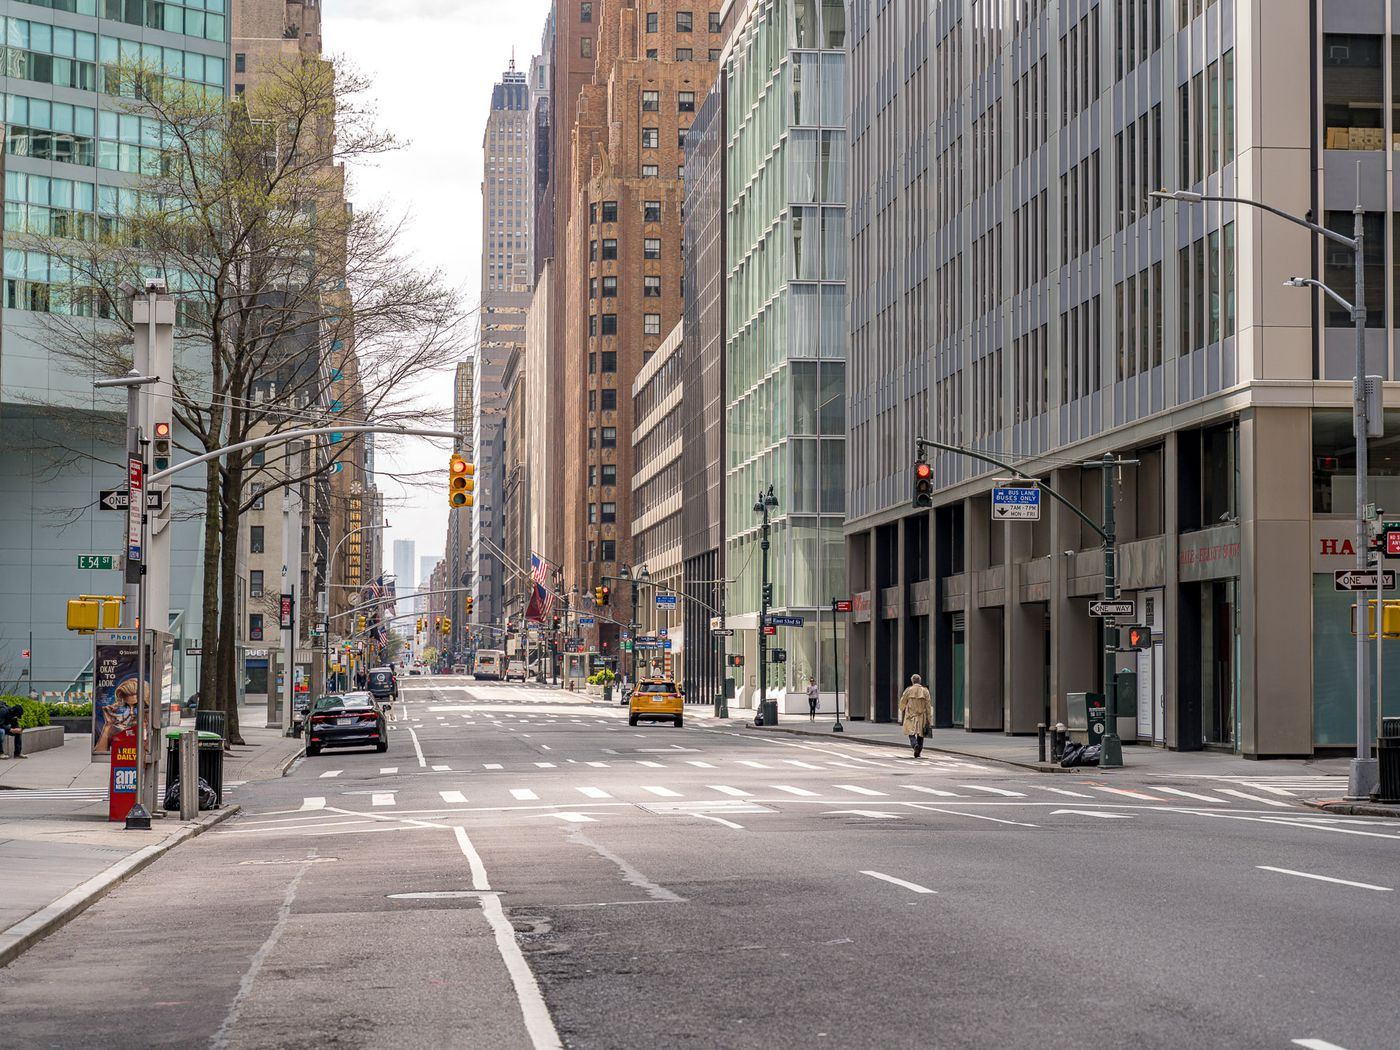

In [2]:
from pathlib import Path 
from PIL import Image 

imagem = Image.open(Path("imagens/cidades/city.jpg"))
imagem

In [3]:
classes = [
	'tree',
	'person',
	'building',
	'US flag',
	'crosswalk'
]

deteccao = detector(imagem, candidate_labels=classes)
deteccao

[{'score': 0.5501276254653931,
  'label': 'building',
  'box': {'xmin': 809, 'ymin': 4, 'xmax': 1395, 'ymax': 749}},
 {'score': 0.5241608619689941,
  'label': 'US flag',
  'box': {'xmin': 529, 'ymin': 551, 'xmax': 550, 'ymax': 585}},
 {'score': 0.5109080672264099,
  'label': 'building',
  'box': {'xmin': 562, 'ymin': 6, 'xmax': 670, 'ymax': 678}},
 {'score': 0.5102131962776184,
  'label': 'US flag',
  'box': {'xmin': 525, 'ymin': 556, 'xmax': 550, 'ymax': 622}},
 {'score': 0.4707624316215515,
  'label': 'building',
  'box': {'xmin': 223, 'ymin': 5, 'xmax': 359, 'ymax': 681}},
 {'score': 0.4692562520503998,
  'label': 'building',
  'box': {'xmin': 474, 'ymin': 33, 'xmax': 540, 'ymax': 665}},
 {'score': 0.4594559371471405,
  'label': 'building',
  'box': {'xmin': 737, 'ymin': 0, 'xmax': 846, 'ymax': 709}},
 {'score': 0.4475667178630829,
  'label': 'building',
  'box': {'xmin': 0, 'ymin': 0, 'xmax': 237, 'ymax': 678}},
 {'score': 0.4115828275680542,
  'label': 'crosswalk',
  'box': {'xmin

In [4]:
threshold = 0.4 
deteccao = [det for det in deteccao if det['score'] >= threshold]


Counter({'building': 6, 'US flag': 3, 'crosswalk': 1})


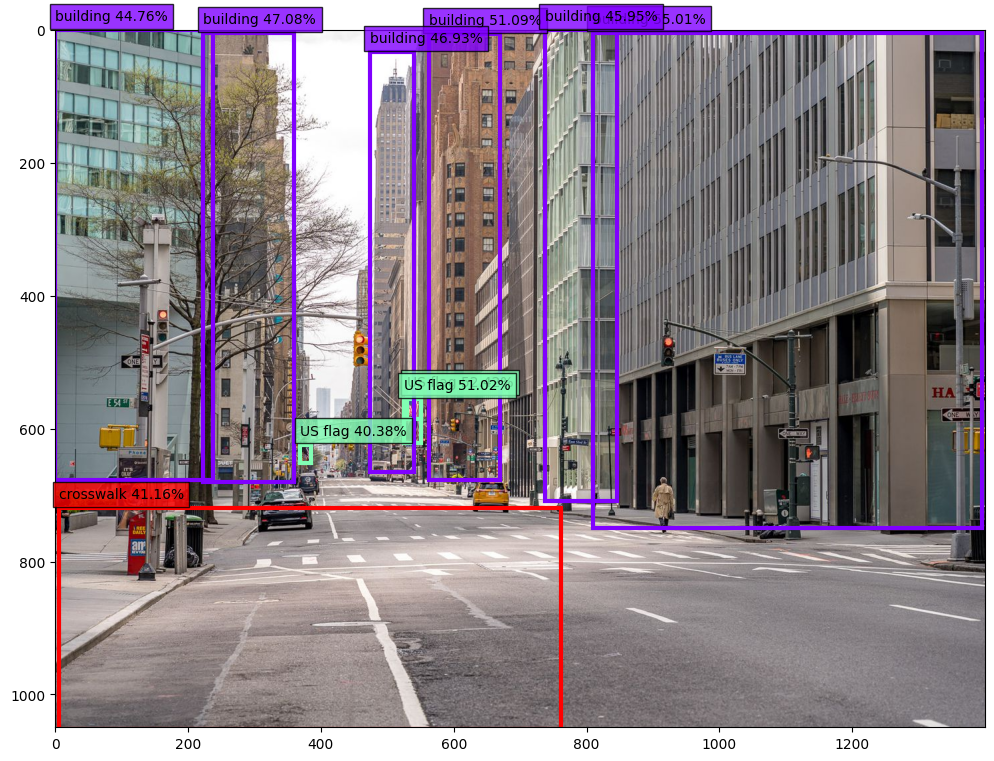

In [5]:
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import colormaps
import numpy as np


def plotar_deteccao(imagem, deteccao, colormap='viridis'):
    labels = {det['label'] for det in deteccao}
    indices_cor = np.linspace(0, 1, len(labels))
    cores = [colormaps.get_cmap(colormap)(x) for x in indices_cor]
    cores = dict(zip(labels, cores))
    
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(imagem)
    
    for det in deteccao:
        box = det['box']
        cor = cores[det['label']]
        origem = (box['xmin'], box['ymin'])
        largura = box['xmax'] - box['xmin']
        altura = box['ymax'] - box['ymin']
        
        rect = patches.Rectangle(origem, largura, altura, linewidth=3, edgecolor=cor, facecolor='none')
        ax.add_patch(rect)

        texto = f"{det['label']} {100 * det['score']:.2f}%"
        ax.text(box['xmin'], box['ymin'] - 15, texto, bbox={'facecolor': cor, 'alpha': 0.8})


contador = Counter(det['label'] for det in deteccao)
print(contador)

plotar_deteccao(imagem=imagem, deteccao=deteccao, colormap='rainbow')
plt.show()

In [6]:
def ajustar_caixas(imagem, deteccao):
    width, height = imagem.size
    width_ratio = 1
    height_ratio = 1
    if width > height:
        height_ratio = height / width
    elif height > width:
        width_ratio = width / height
    for det in deteccao:
        det['box']['xmin'] = det['box']['xmin'] / width_ratio
        det['box']['xmax'] = det['box']['xmax'] / width_ratio
        det['box']['ymin'] = det['box']['ymin'] / height_ratio
        det['box']['ymax'] = det['box']['ymax'] / height_ratio

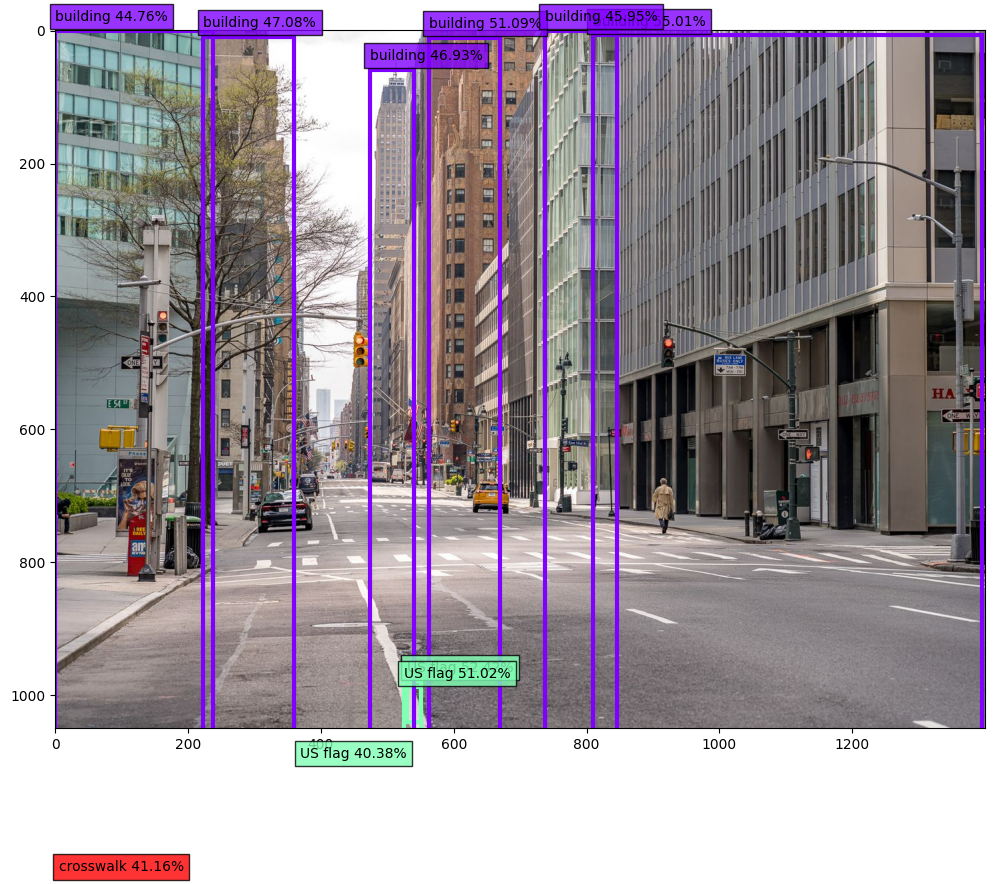

In [8]:
ajustar_caixas(imagem=imagem, deteccao=deteccao)
plotar_deteccao(imagem=imagem, deteccao=deteccao, colormap='rainbow')
plt.show()

Counter({'tree': 13, 'house': 6, 'chair': 5, 'building': 3, 'painting': 1})


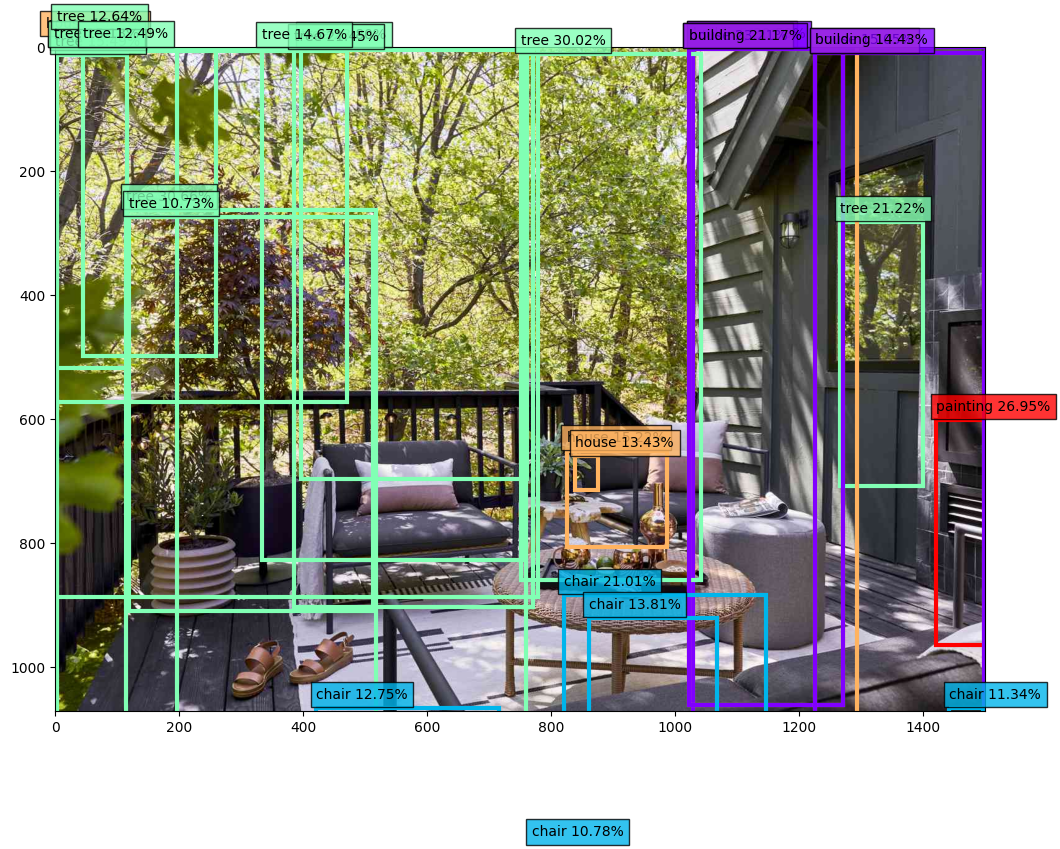

Counter({'house': 1, 'building': 1})


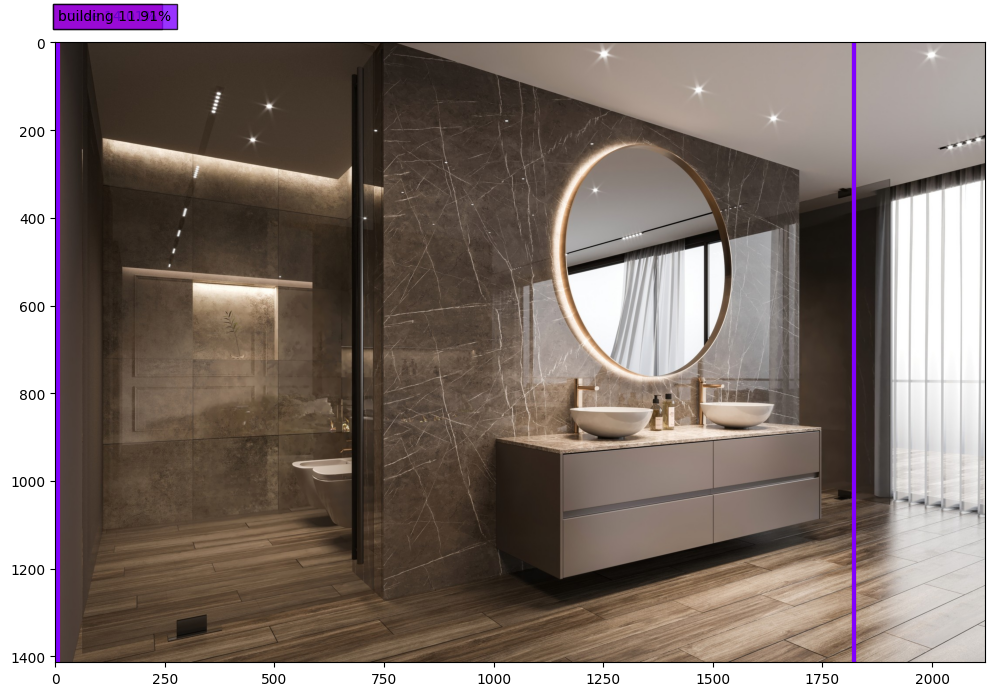

Counter({'painting': 8, 'chair': 2, 'tree': 1})


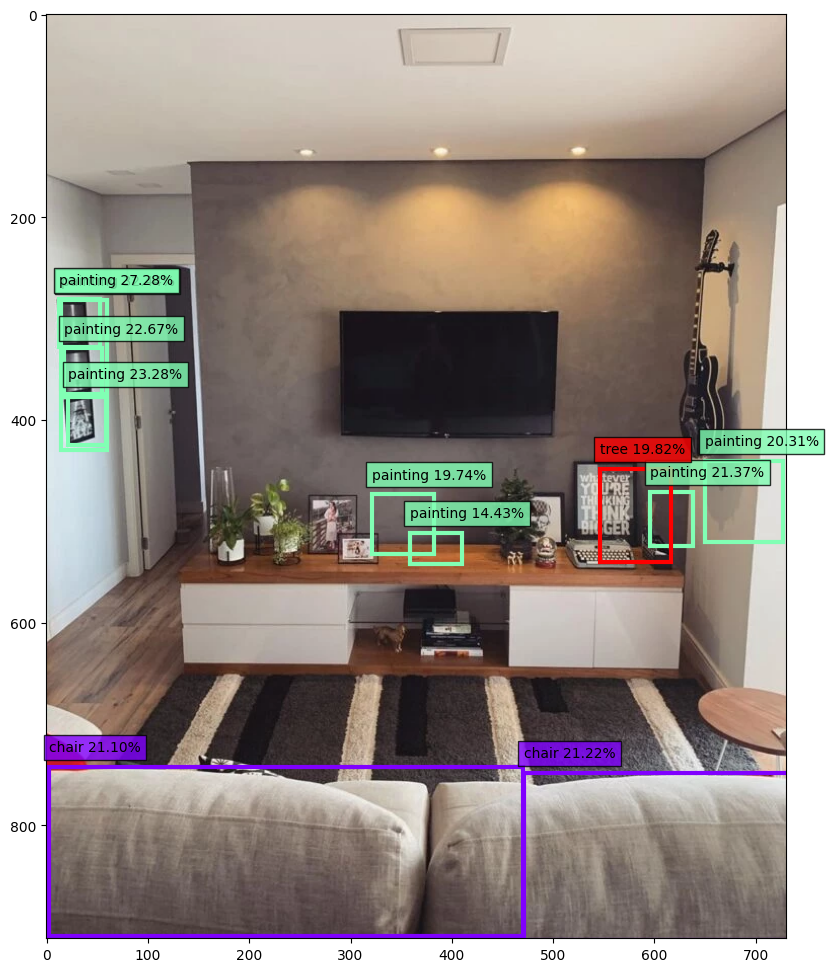

KeyboardInterrupt: 

In [9]:
labels = [
    'chair',
    'painting',
    'pedestrian',
    'building',
    'house',
    'tree',
]
threshold = 0.1


imagens = [Image.open(arquivo) for arquivo in Path('imagens/casas').iterdir()]

for imagem in imagens:    
    deteccao = detector(imagem, candidate_labels=labels)
    
    deteccao = [det for det in deteccao if det['score'] >= threshold]
    
    contador = Counter(det['label'] for det in deteccao)
    print(contador)
    
    ajustar_caixas(imagem=imagem, deteccao=deteccao)
    plotar_deteccao(imagem=imagem, deteccao=deteccao, colormap='rainbow')
    plt.show()